# El EDA es exploratorio: 
### No se modifica datos permanentes aquí; se documentan los hallazgos para aplicarlos después.

In [2]:
# Librerias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys
import os

sys.path.append(os.path.abspath('../src'))

from utilitarios_eda import detectar_outliers_isolation_forest

In [4]:
# Leer los datos que escriben las características de los núcleos celulares presentes 
# en la imagen digitalizada de una aspiración con aguja fina (PAAF) de una masa mamaria.
crudo_data = pd.read_csv('../datasets/raw/data.csv', sep=',')

# Visualización de los datos 

In [5]:
crudo_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
crudo_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
crudo_data.shape

(569, 33)

In [8]:
crudo_data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
porcentaje_diagnostico = crudo_data['diagnosis'].value_counts(normalize=True) * 100
print(porcentaje_diagnostico)

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


In [10]:
crudo_data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [11]:
crudo_data.query('id == 84358402')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
4,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,...,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,NaN


In [12]:
crudo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Duplicados

In [13]:
crudo_data[crudo_data['id'].duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [14]:
total_repetidos = crudo_data.duplicated().sum()
print(f'El total de repetidos es: {total_repetidos}')

El total de repetidos es: 0


Conclusiones: no hay repetidos en el set de datos 

# Analisis de valores ausentes

In [15]:
crudo_data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

No hay valores ausentes
la variable Unnamed: 32 es un error de lectura de python 
Conclusion: esta caracteristica se debe eliminar porque no representa ningun valor en los datos

# Identificación de Outliers

In [16]:
cruda_data_sin_diagnostico = crudo_data.drop(columns=['diagnosis','id'])

In [17]:
# Usar la función
outlier_labels, outliers = detectar_outliers_isolation_forest(cruda_data_sin_diagnostico, contamination=0.05)

data_con_labels = crudo_data.copy()
data_con_labels["outlier"] = outlier_labels

print(outliers.head())



    radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         17.99         10.38          122.80     1001.0          0.11840   
3         11.42         20.38           77.58      386.1          0.14250   
9         12.46         24.04           83.97      475.9          0.11860   
12        19.17         24.80          132.40     1123.0          0.09740   
42        19.07         24.81          128.30     1104.0          0.09081   

    compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.2776          0.3001              0.14710         0.2419   
3             0.2839          0.2414              0.10520         0.2597   
9             0.2396          0.2273              0.08543         0.2030   
12            0.2458          0.2065              0.11180         0.2397   
42            0.2190          0.2107              0.09961         0.2310   

    fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0

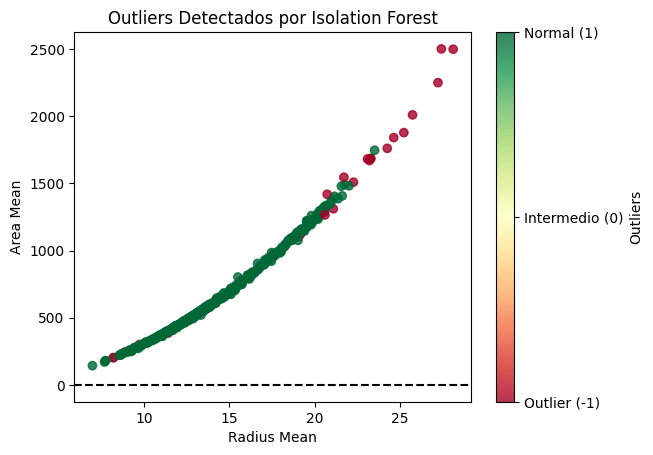

In [18]:
# Gráfico de dispersión coloreando los outliers
scatter = plt.scatter(
    x="radius_mean", 
    y="area_mean", 
    data=data_con_labels, 
    alpha=0.8, 
    c=data_con_labels["outlier"], 
    cmap="RdYlGn"  # Mapa de colores más vivo: rojo para outliers, verde para normales
)
plt.title("Outliers Detectados por Isolation Forest")
plt.xlabel("Radius Mean")
plt.ylabel("Area Mean")

# Agregar una barra de color con etiquetas claras
cbar = plt.colorbar(scatter, label="Outliers")
cbar.set_ticks([-1, 0, 1])  # Etiquetas en la barra de color
cbar.set_ticklabels(["Outlier (-1)", "Intermedio (0)", "Normal (1)"])

plt.axhline(y=0, color='k', linestyle='--')
plt.show()

En el ámbito médico, los valores atipicos (outliers) podrían representar casos pocos comunes,pero reales, subtipos raros con carácteristicas inusuales, valoraciones propias del dataset que no necesariamente son errores, por lo que no se podria hacer pruebas una manteniendo los outliers y otra eliminandolos. 

In [19]:
crudo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Analisis de  distribución y tendencias

In [20]:
crudo_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [21]:
crudo_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

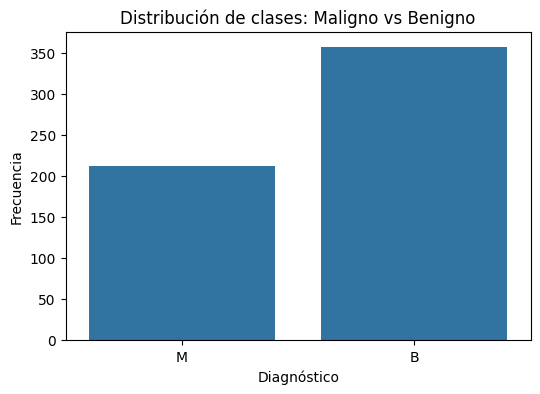

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=crudo_data)
plt.title('Distribución de clases: Maligno vs Benigno')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.show()


Las categorias de diagnostico se encuentran desvalanceadas, representando con diagnóstico Benigno son el 62.7% del total de la muestra; mientras que los casos Malignos representan el 37.26% de la muestra

## radius_mean              

Un núcleo de radio más grande puede ser una señal de crecimiento anormal, lo cual podría estar relacionado con malignidad.

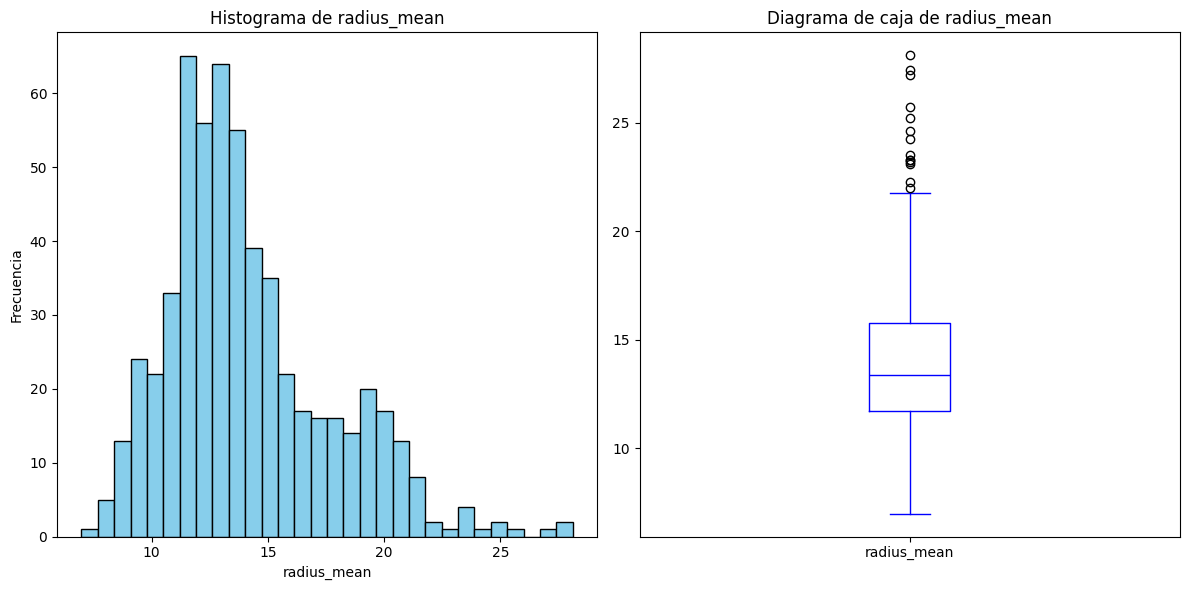

In [23]:
# Crear una figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma en el primer subgráfico
crudo_data['radius_mean'].plot(kind='hist', bins=30, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de radius_mean')
axes[0].set_xlabel('radius_mean')
axes[0].set_ylabel('Frecuencia')

# Diagrama de caja en el segundo subgráfico
crudo_data['radius_mean'].plot(kind='box', ax=axes[1], color='blue')
axes[1].set_title('Diagrama de caja de radius_mean')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Conclusion: esta gráfica concuerda con la clase benigna como la mas frecuente en la data, pero aun asi no nos dice su incidencia en la detección de cáncer

# radius vs texture

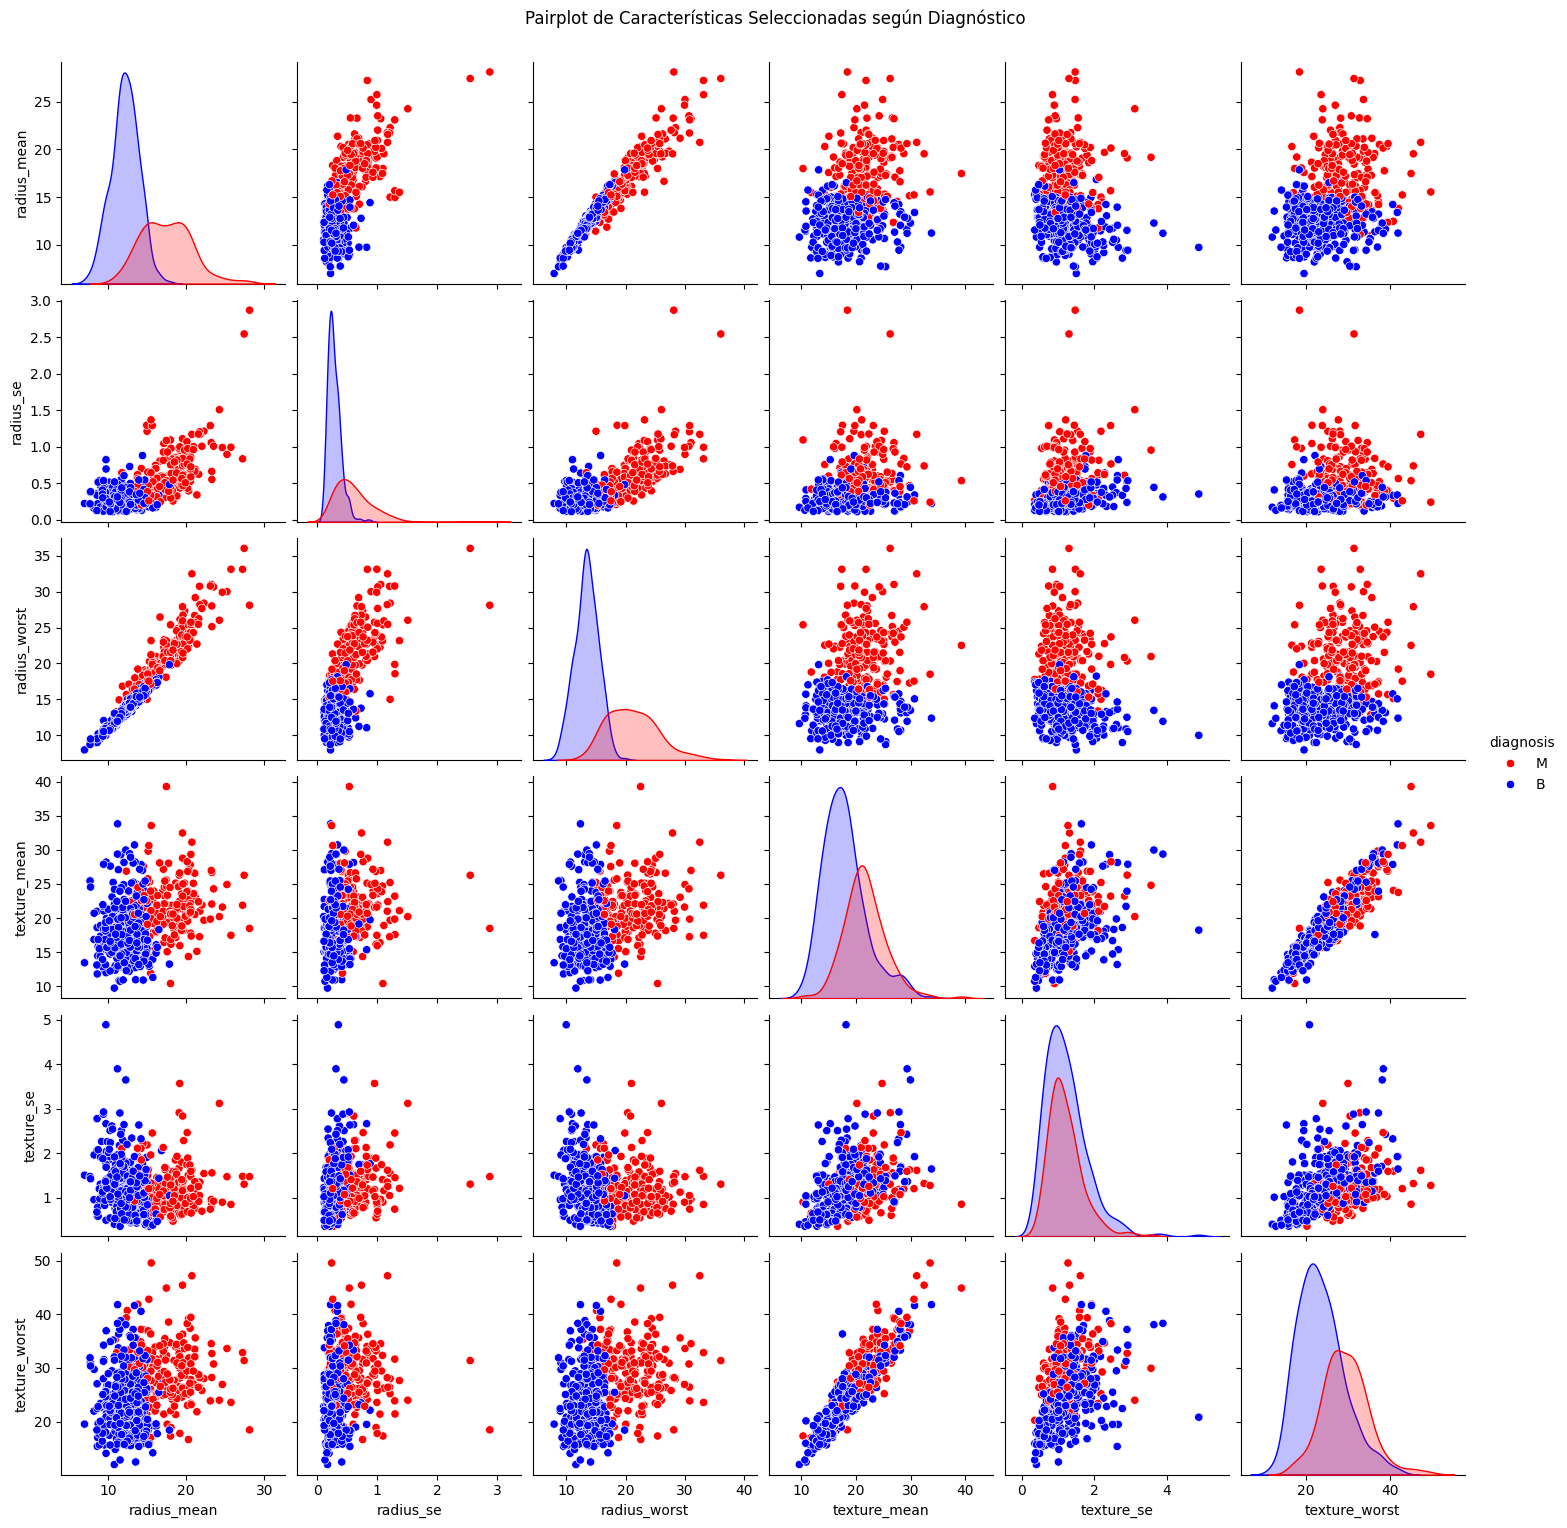

In [24]:
# Seleccionar columnas relevantes
features = ['radius_mean', 'radius_se', 'radius_worst', 'texture_mean', 'texture_se', 'texture_worst']
subset = crudo_data[features + ['diagnosis']]

# Especificar una paleta personalizada para diferenciar los colores
palette = {'B': 'blue', 'M': 'red'}
# Crear el pairplot
sns.pairplot(subset, hue='diagnosis',palette=palette)
plt.suptitle('Pairplot de Características Seleccionadas según Diagnóstico', y=1.02)
plt.show()

En las gráficas que representan las columnas mean, SE, y worst, se puede observar que la característica textura SE para los dos tipos de células, malignas y benignas, presenta una media similar. Esto implica que, si esta variable fuera utilizada en el modelo predictivo, podría generar cierta confusión debido a la falta de separación evidente entre las clases. Sin embargo, al ser SE la desviación estándar, esto indica que tanto las células benignas como las malignas mantienen una dispersión similar en esta característica.

Por otro lado, se identifica un patrón diferente en la característica radio, donde las gráficas muestran una mayor diferenciación entre las clases. Esta separación podría ser más útil para el modelo predictivo, ya que ofrece una distinción más clara entre los diagnósticos malignos y benignos.

In [25]:
# funcion para graficar pairplot 


def plot_pairplot(subset):
    """
    Genera un pairplot de un DataFrame con una columna 'diagnosis' como variable de color.
    
    Parámetros:
    subset (DataFrame): DataFrame que contiene las características y la columna 'diagnosis'.
    """
    # Especificar una paleta personalizada para diferenciar los colores
    palette = {'B': 'blue', 'M': 'red'}
    
    # Crear el pairplot
    sns.pairplot(subset, hue='diagnosis', palette=palette)
    plt.suptitle('Pairplot de Características Seleccionadas según Diagnóstico', y=1.02)
    plt.show()

## perimeter vs smoothness         

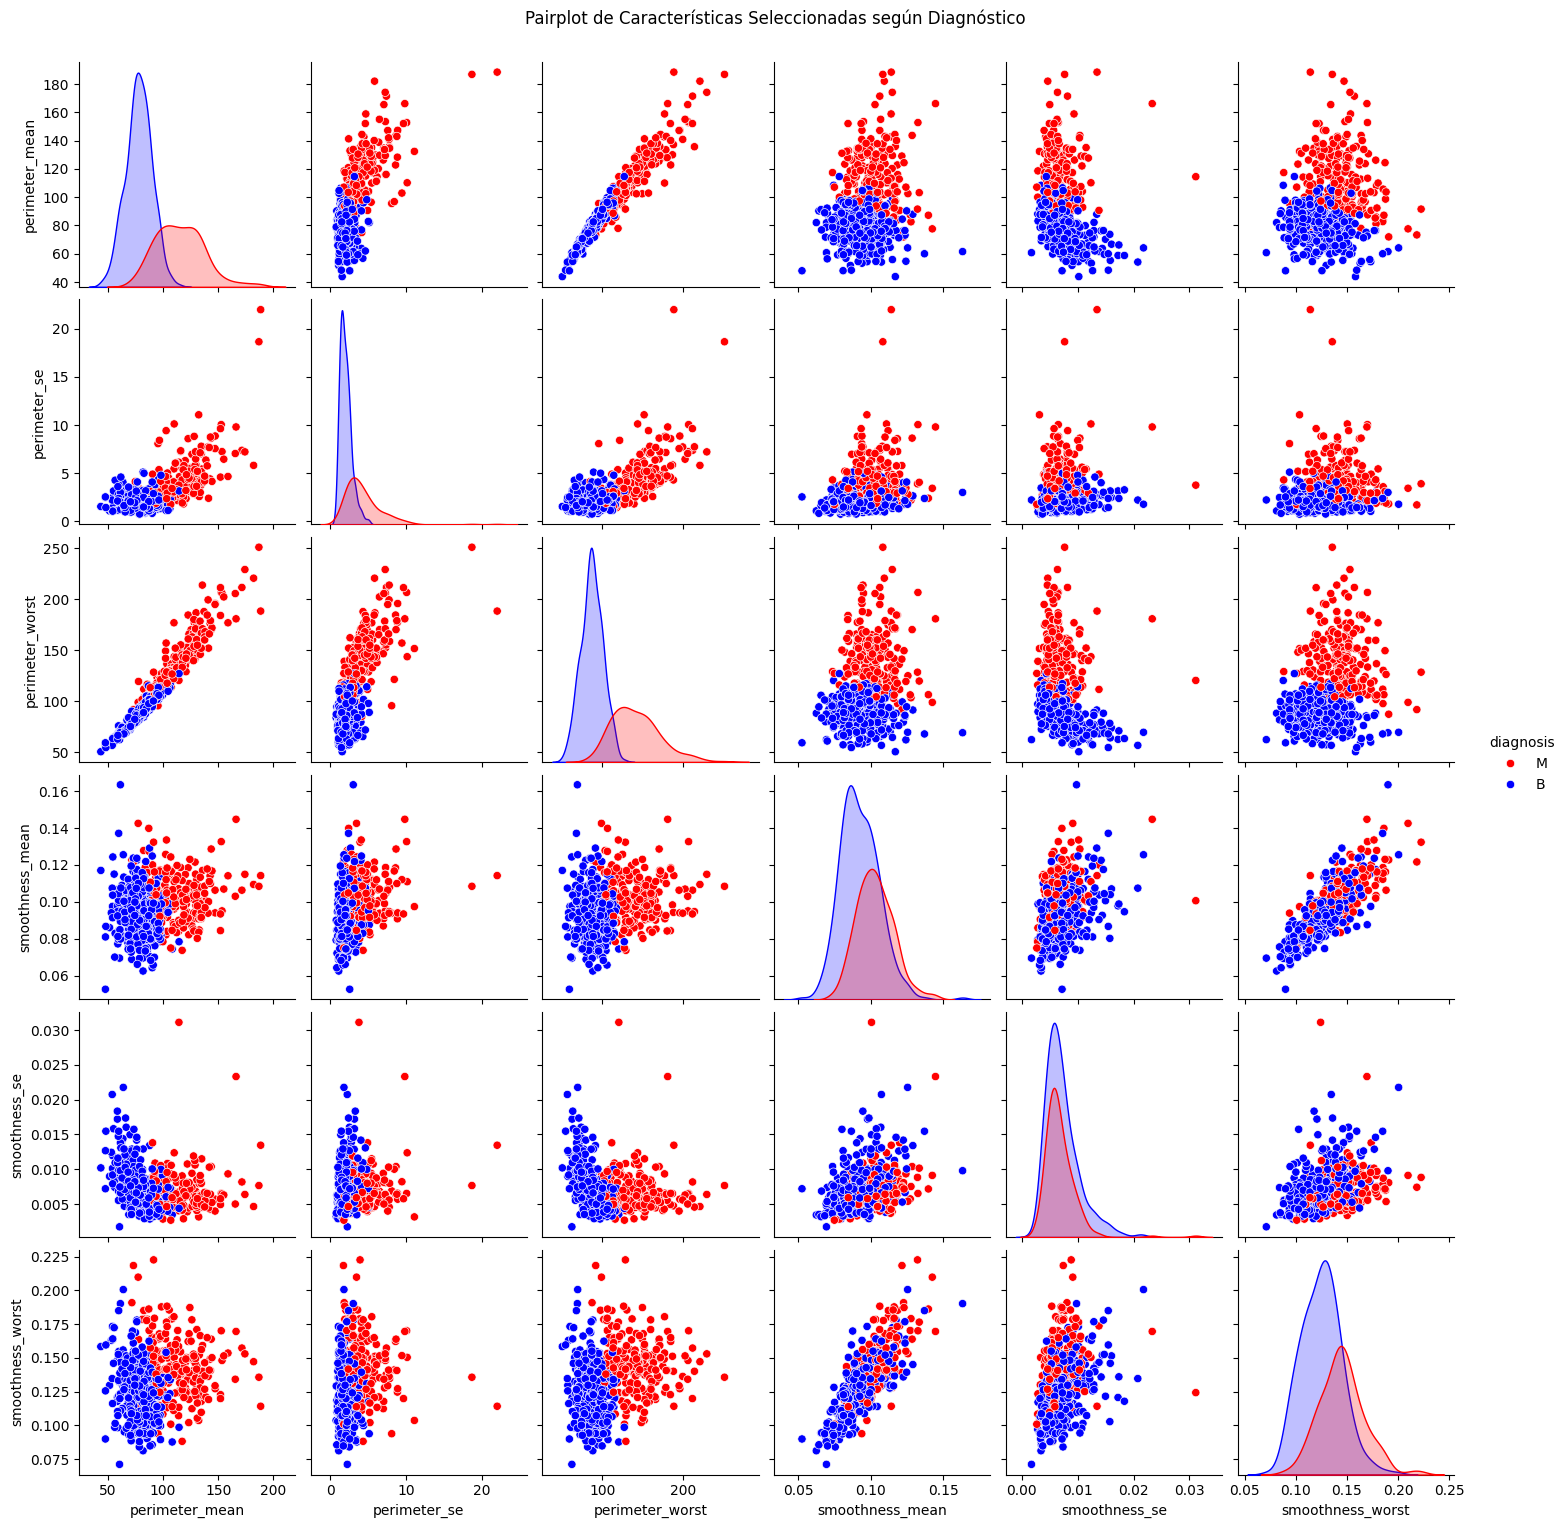

In [26]:
# Seleccionar columnas relevantes
features = ['perimeter_mean', 'perimeter_se', 'perimeter_worst', 'smoothness_mean', 'smoothness_se', 'smoothness_worst']
subset = crudo_data[features + ['diagnosis']]

plot_pairplot(subset)

Al igual que en el radio, la clave SE no muestra una distinción en smoothness

## area_mean                

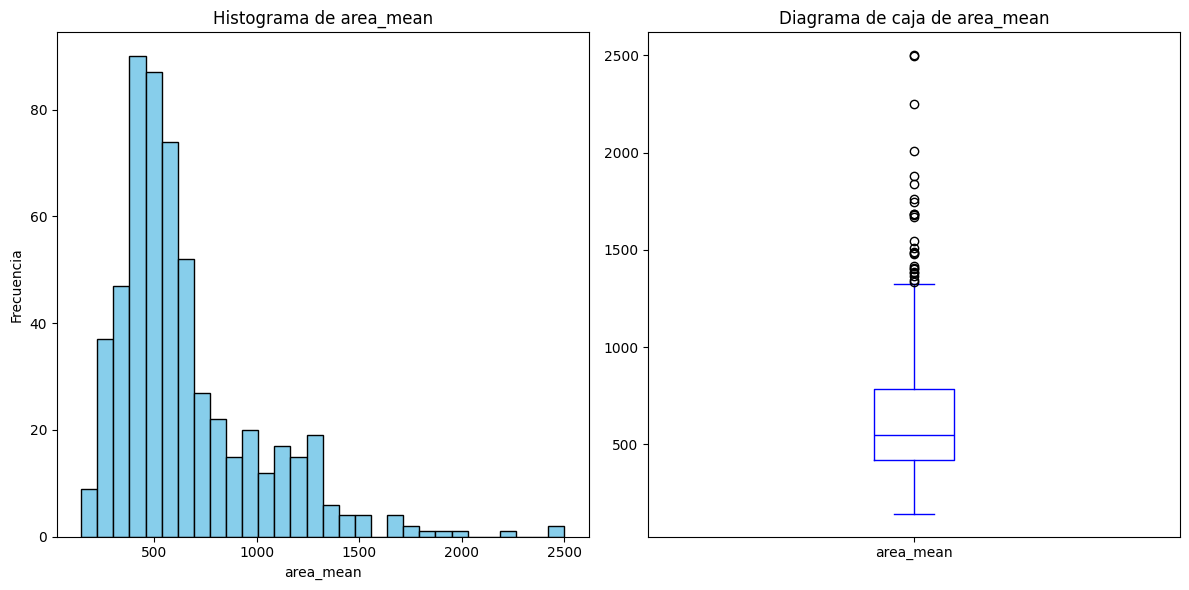

In [27]:
# Crear una figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma en el primer subgráfico
crudo_data['area_mean'].plot(kind='hist', bins=30, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de area_mean')
axes[0].set_xlabel('area_mean')
axes[0].set_ylabel('Frecuencia')

# Diagrama de caja en el segundo subgráfico
crudo_data['area_mean'].plot(kind='box', ax=axes[1], color='blue')
axes[1].set_title('Diagrama de caja de area_mean')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Conclusion: muestra que la frecuencia de los datos tiene celulas de area cercanas a 500, que sean mayores significarian que tienen incidencia en cancer maligno

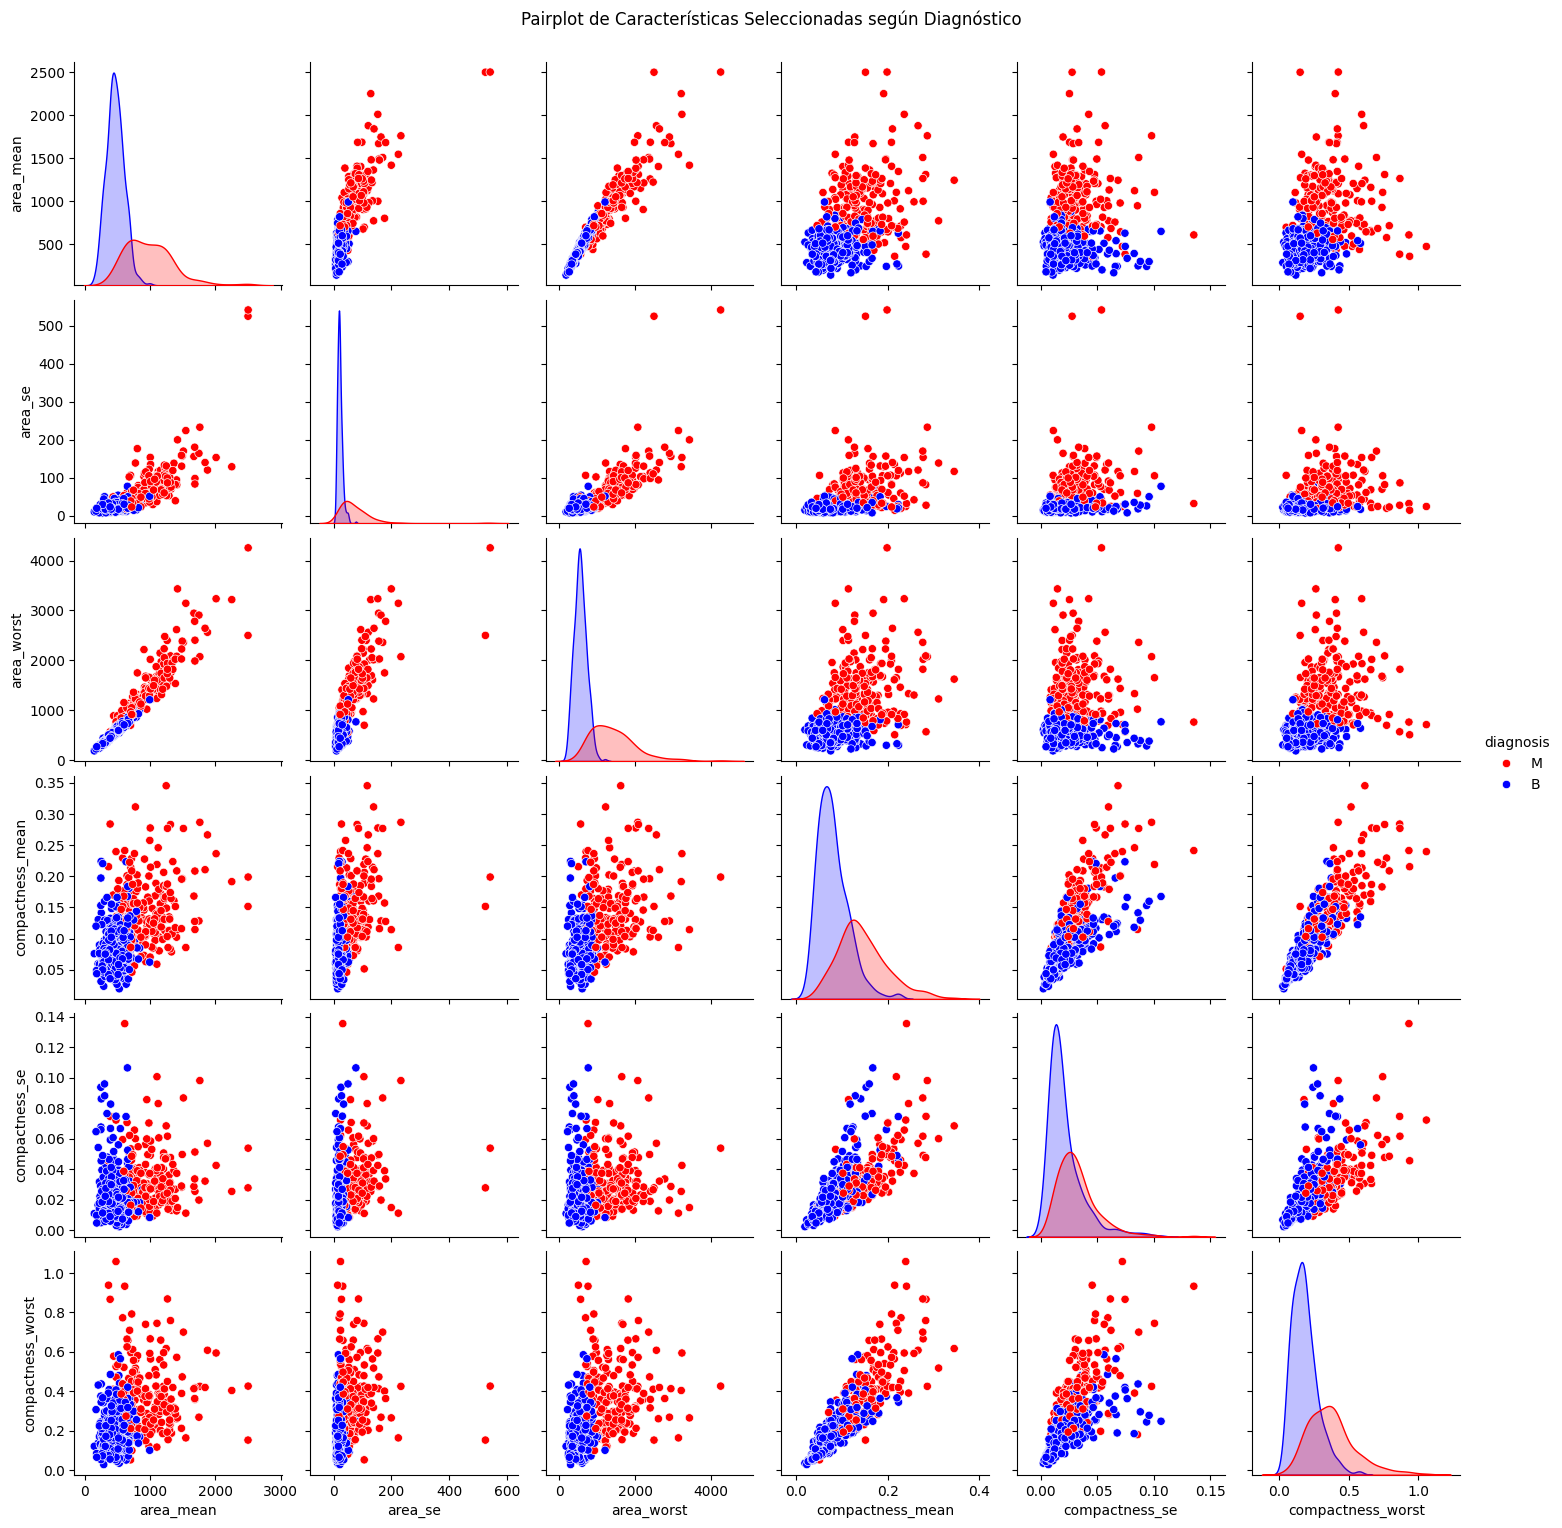

In [28]:
# Seleccionar columnas relevantes
features = ['area_mean', 'area_se', 'area_worst', 'compactness_mean', 'compactness_se', 'compactness_worst']
subset = crudo_data[features + ['diagnosis']]

plot_pairplot(subset)

## smoothness_mean          

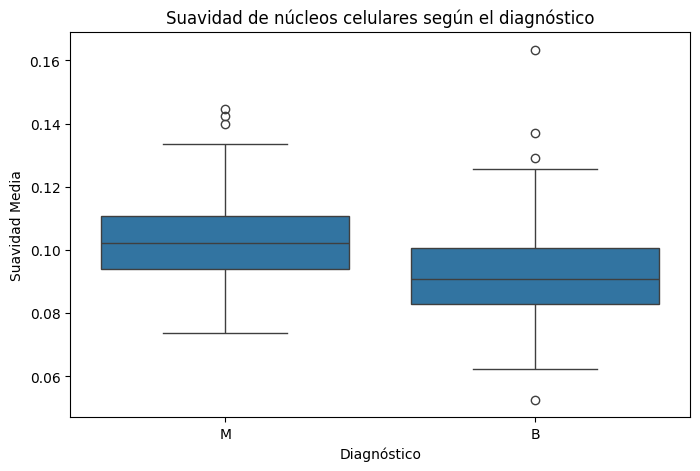

In [29]:
# Boxplot de suavidad según el diagnóstico
plt.figure(figsize=(8, 5))
sns.boxplot(x='diagnosis', y='smoothness_mean', data=crudo_data)
plt.title('Suavidad de núcleos celulares según el diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Suavidad Media')
plt.show()

In [30]:
# Calcular el promedio de múltiples columnas agrupadas por 'diagnosis'
promedio_smoothness = crudo_data.groupby('diagnosis')[['smoothness_mean', 'smoothness_se','smoothness_worst']].mean()

# Mostrar los resultados
print(promedio_smoothness)

           smoothness_mean  smoothness_se  smoothness_worst
diagnosis                                                  
B                 0.092478       0.007196          0.124959
M                 0.102898       0.006780          0.144845


In [31]:
# Convertir las categorías a valores binarios
crudo_data_diagnostico_binarioNum = crudo_data.copy()
crudo_data_diagnostico_binarioNum['diagnosis'] = crudo_data_diagnostico_binarioNum['diagnosis'].map({'M': 1, 'B': 0})

# Calcular correlación entre las características y el diagnóstico
correlation = crudo_data_diagnostico_binarioNum[['smoothness_mean', 'smoothness_se', 'smoothness_worst', 'diagnosis']].corr()
print(correlation)

                  smoothness_mean  smoothness_se  smoothness_worst  diagnosis
smoothness_mean          1.000000       0.332375          0.805324   0.358560
smoothness_se            0.332375       1.000000          0.314457  -0.067016
smoothness_worst         0.805324       0.314457          1.000000   0.421465
diagnosis                0.358560      -0.067016          0.421465   1.000000


smoothness_se, no parece ser representativa para el diagnóstico. se podrías descartar esta columna para reducir el ruido en tu modelo.


## concavity_mean           

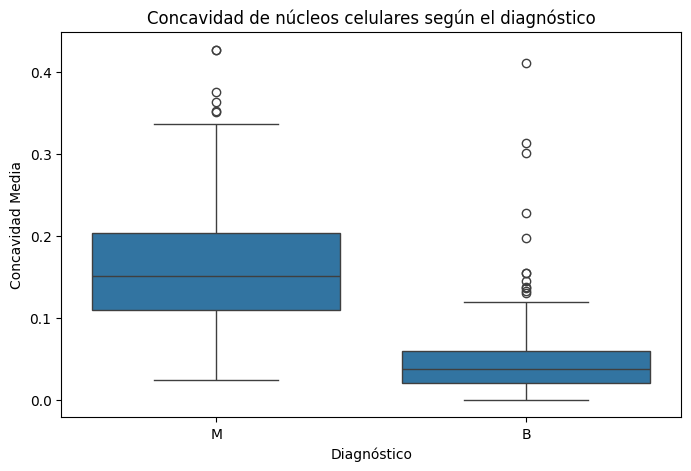

In [32]:
# Boxplot de suavidad según el diagnóstico
plt.figure(figsize=(8, 5))
sns.boxplot(x='diagnosis', y='concavity_mean', data=crudo_data)
plt.title('Concavidad de núcleos celulares según el diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Concavidad Media')
plt.show()

In [33]:
# Calcular correlación entre las características y el diagnóstico
correlation = crudo_data_diagnostico_binarioNum[['concavity_mean', 'concavity_se', 'concavity_worst', 'diagnosis']].corr()
print(correlation)

                 concavity_mean  concavity_se  concavity_worst  diagnosis
concavity_mean         1.000000      0.691270         0.884103    0.69636
concavity_se           0.691270      1.000000         0.662564    0.25373
concavity_worst        0.884103      0.662564         1.000000    0.65961
diagnosis              0.696360      0.253730         0.659610    1.00000


La correlación más baja es la de la clave se, que se puede quitar dado que podria causar redundancia en el modelo

## concave points_mean

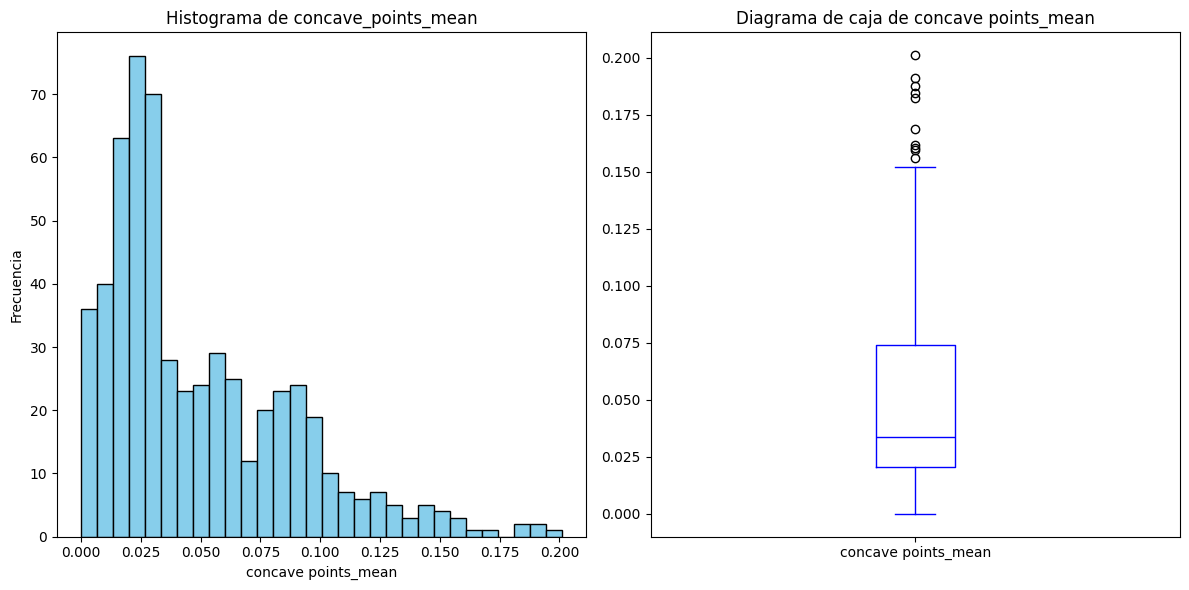

In [34]:
# Crear una figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma en el primer subgráfico
crudo_data['concave points_mean'].plot(kind='hist', bins=30, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de concave_points_mean')
axes[0].set_xlabel('concave points_mean')
axes[0].set_ylabel('Frecuencia')

# Diagrama de caja en el segundo subgráfico
crudo_data['concave points_mean'].plot(kind='box', ax=axes[1], color='blue')
axes[1].set_title('Diagrama de caja de concave points_mean')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## symmetry_mean 

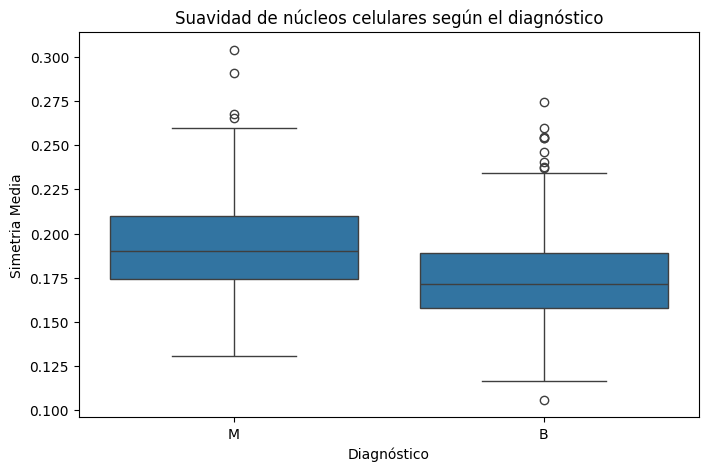

In [35]:
# Boxplot de suavidad según el diagnóstico
plt.figure(figsize=(8, 5))
sns.boxplot(x='diagnosis', y='symmetry_mean', data=crudo_data)
plt.title('Suavidad de núcleos celulares según el diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Simetria Media')
plt.show()

## fractal_dimension_mean

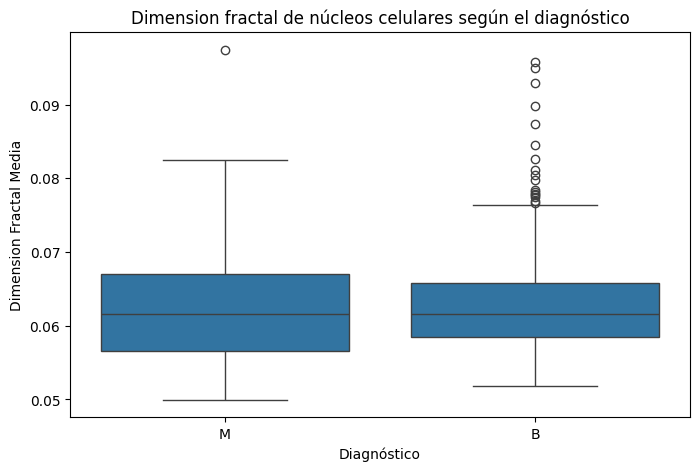

In [36]:
# Boxplot de suavidad según el diagnóstico
plt.figure(figsize=(8, 5))
sns.boxplot(x='diagnosis', y='fractal_dimension_mean', data=crudo_data)
plt.title('Dimension fractal de núcleos celulares según el diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Dimension Fractal Media')
plt.show()

In [37]:
# Calcular correlación entre las características y el diagnóstico
correlation = crudo_data_diagnostico_binarioNum[['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst', 'diagnosis']].corr()
print(correlation)

                         fractal_dimension_mean  fractal_dimension_se  \
fractal_dimension_mean                 1.000000              0.688132   
fractal_dimension_se                   0.688132              1.000000   
fractal_dimension_worst                0.767297              0.591328   
diagnosis                             -0.012838              0.077972   

                         fractal_dimension_worst  diagnosis  
fractal_dimension_mean                  0.767297  -0.012838  
fractal_dimension_se                    0.591328   0.077972  
fractal_dimension_worst                 1.000000   0.323872  
diagnosis                               0.323872   1.000000  


se podria descartar fractal_mean y se, sin embargo se podria mantener fracta_dimension_worst ya que aunque no tiene una correlación alta, muestra una relación moderada que podría ser útil para predecir el diagnóstico maligno o benigno.